<a href="https://colab.research.google.com/github/thamannajeseen-spec/Internship/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
column_names = [
    'class',
    'age',
    'menopause',
    'tumor-size',
    'inv-nodes',
    'node-caps',
    'deg-malig',
    'breast',
    'breast-quad',
    'irradiat'
]
df=pd.read_csv('breast-cancer.data',names=column_names)
df.head()


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
df.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [ ]:
df.shape

(286, 10)

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
class,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
age,30-39,40-49,40-49,60-69,40-49,60-69,50-59,60-69,40-49,40-49
menopause,premeno,premeno,premeno,ge40,premeno,ge40,premeno,ge40,premeno,premeno
tumor-size,30-34,20-24,20-24,15-19,0-4,15-19,25-29,20-24,50-54,20-24
inv-nodes,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
node-caps,no,no,no,no,no,no,no,no,no,no
deg-malig,3,2,2,2,2,2,2,1,2,2
breast,left,right,left,right,right,left,left,left,left,right
breast-quad,left_low,right_up,left_low,left_up,right_low,left_low,left_low,left_low,left_low,left_up
irradiat,no,no,no,no,no,no,no,no,no,no


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals= df[col].dropna().unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("." * 50)

Column 'class' (2 unique values):
['no-recurrence-events' 'recurrence-events']
..................................................
Column 'age' (6 unique values):
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
..................................................
Column 'menopause' (3 unique values):
['premeno' 'ge40' 'lt40']
..................................................
Column 'tumor-size' (11 unique values):
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
..................................................
Column 'inv-nodes' (7 unique values):
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
..................................................
Column 'node-caps' (3 unique values):
['no' 'yes' '?']
..................................................
Column 'breast' (2 unique values):
['left' 'right']
..................................................
Column 'breast-quad' (6 unique values):
['left_low' 'right_up' 'left_up' 'right_low' 'central' 

In [ ]:
for col in df.columns:
    q_count = df[col][df[col] == '?'].count()
    nan_count = df[col].isna().sum()
    total_missing = q_count + nan_count
    if total_missing:
        print(f"Column '{col}': '?' = {q_count}, NaN = {nan_count}, Total missing = {total_missing}")

Column 'node-caps': '?' = 8, NaN = 0, Total missing = 8
Column 'breast-quad': '?' = 1, NaN = 0, Total missing = 1


In [ ]:
import numpy as np
df_missing = df.replace("?", np.nan)


missing_proportions = df_missing.isna().mean()

for col, prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}': {prop:.2%} missing (including '?')")

Column 'node-caps': 2.80% missing (including '?')
Column 'breast-quad': 0.35% missing (including '?')


The percentage of missing values is very less.So it will not effect the acuracy of the model.

In [ ]:
df.replace('?',np.nan,inplace=True)

In [ ]:
df=df.drop(['breast-quad'],axis=1)
df.dropna(subset=['node-caps'],inplace=True)

In [ ]:
df.shape

(278, 9)

In [ ]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

class 0
age 0
menopause 0
tumor-size 0
inv-nodes 0
node-caps 0
breast 0
irradiat 0


We want to predict whether the patient will experience recurrence of cancer based on their clinical results

In [ ]:
df['class']=df['class'].replace('no-recurrence-events',0)
df['class']=df['class'].replace('recurrence-events',1)
df['class'].value_counts()

/tmp/ipykernel_6288/44797081.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class']=df['class'].replace('recurrence-events',1)


class
0    196
1     82
Name: count, dtype: int64

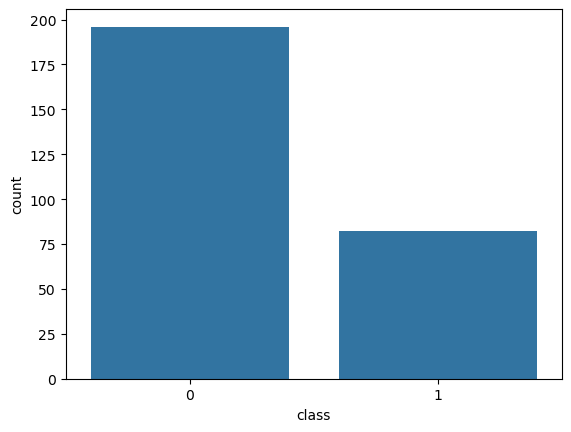

In [ ]:
sns.countplot(x='class',data=df)
plt.show()


From the graph we can understand that there is big difference between the proportion of patients getting recurrence of cancer and those who don't.

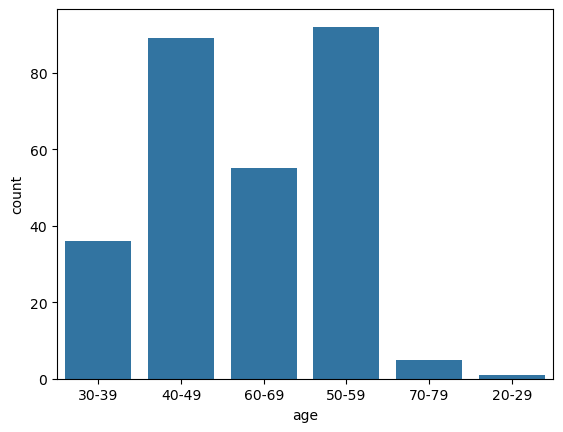

In [ ]:
sns.countplot(x='age',data=df)
plt.show()

Let's convert age to continues numeric values

In [ ]:
df['age']=df['age'].replace({'20-29':25,'30-39':35,'40-49':45,'50-59':55,'60-69':65,'70-79':75})

/tmp/ipykernel_6288/524912557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age']=df['age'].replace({'20-29':25,'30-39':35,'40-49':45,'50-59':55,'60-69':65,'70-79':75})


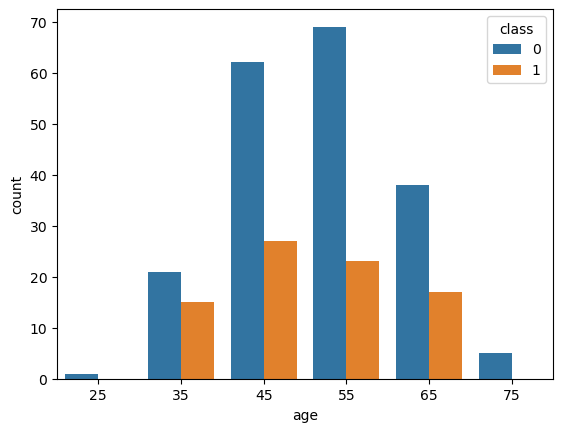

In [ ]:
sns.countplot(x='age',hue='class',data=df)
plt.show()

recurrence event is more in age 45 ,55,65 and less frequent in 75 and no recurrence is for age 25

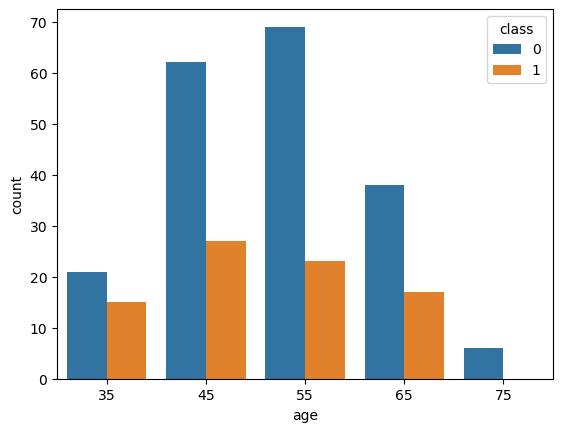

In [ ]:
df['age']=df['age'].replace(25,75)
sns.countplot(x='age',hue='class',data=df)
plt.show()


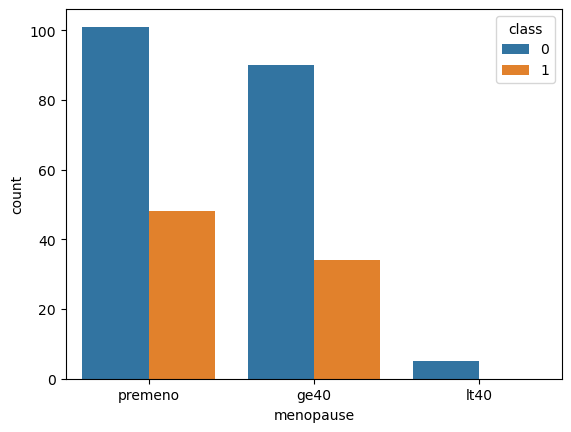

In [ ]:
sns.countplot(x='menopause',hue='class',data=df)
plt.show()

recurrence of cancer is more in patients entered premeno and ge40 phases of menopause. let convert these values to numerical values.The patients in premeno stage ie those who not yet entered menopause and lt40 patient less than 40 years old are same.because menopause occur after 40 years.

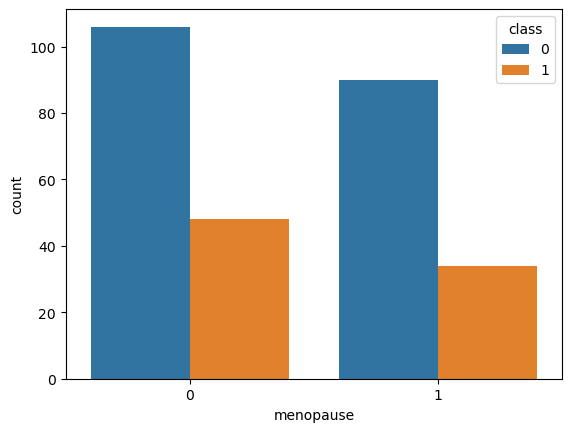

In [ ]:
df['menopause']=df['menopause'].replace({'premeno':0,'ge40':1,'lt40':0})
sns.countplot(x='menopause',hue='class',data=df)
plt.show()


/tmp/ipykernel_6288/2885774504.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tumor-size']=df['tumor-size'].replace({'0-4':2,'5-9':7,'10-14':12,'15-19':17,'20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,})


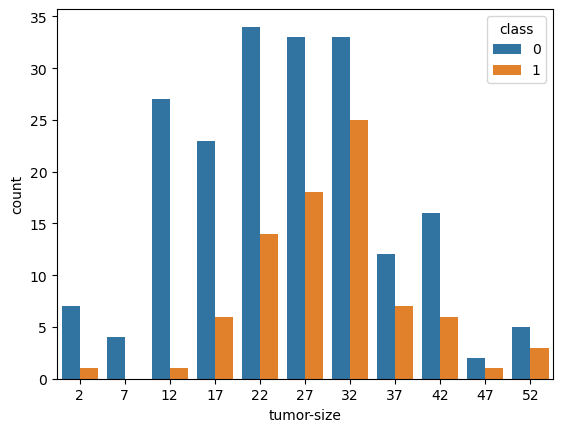

In [ ]:
df['tumor-size']=df['tumor-size'].replace({'0-4':2,'5-9':7,'10-14':12,'15-19':17,'20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52,})
sns.countplot(x='tumor-size',hue='class',data=df)
plt.show()

So as the size of tumor increases the probablity of recurrence of cancer increases.


/tmp/ipykernel_6288/1405172372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['inv-nodes']=df['inv-nodes'].replace({'0-2':1,'3-5':4,'6-8':7,'9-11':10,'12-14':13,'15-17':16,'24-26':25})


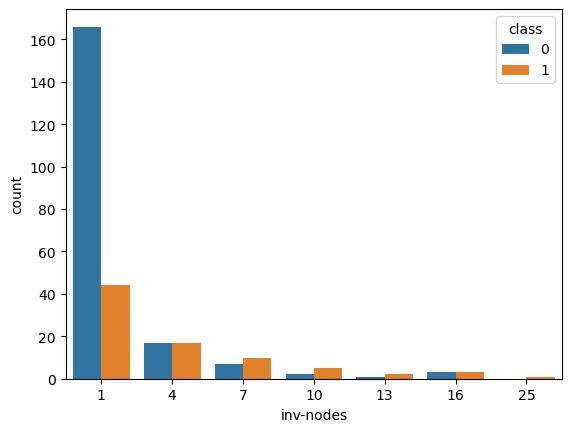

In [ ]:
df['inv-nodes']=df['inv-nodes'].replace({'0-2':1,'3-5':4,'6-8':7,'9-11':10,'12-14':13,'15-17':16,'24-26':25})
sns.countplot(x='inv-nodes',hue='class',data=df)
plt.show()

As the number of inv-nodes increases the probobality of recurrence of cancer also increase.

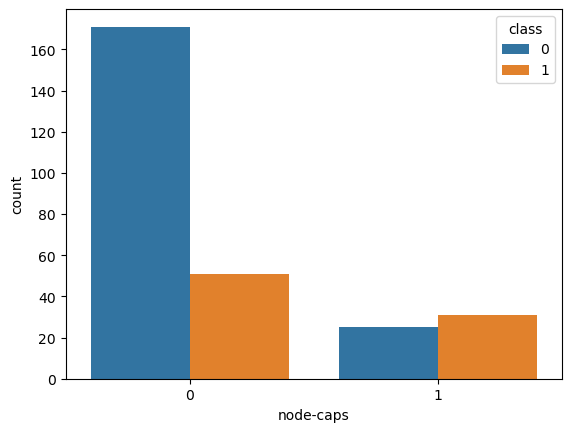

In [ ]:
df['node-caps']=df['node-caps'].replace({'no':0,'yes':1})
sns.countplot(x='node-caps',hue='class',data=df)
plt.show()

If the  cancer has spread beyond the wall (capsule) of the lymph nodes ie when node-cap is 'yes' the probablity of reccurence of cancer is huge.

/tmp/ipykernel_6288/1192044277.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['breast']=df['breast'].replace({'left':0,'right':1})


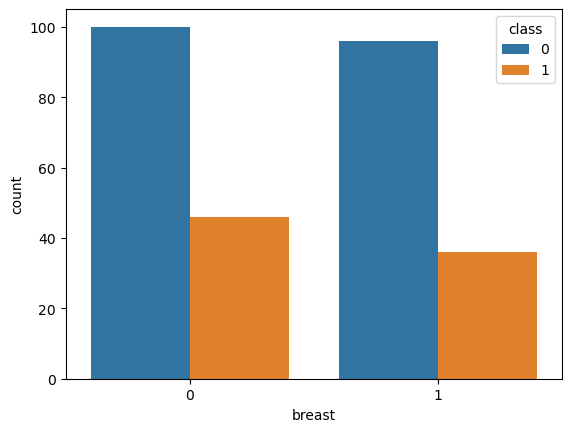

In [ ]:
df['breast']=df['breast'].replace({'left':0,'right':1})
sns.countplot(x='breast',hue='class',data=df)
plt.show()

The probablity of reccurence is almost equal when the breast is left or right side

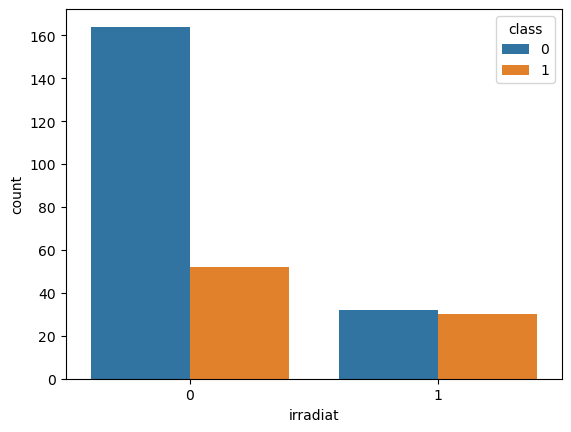

In [ ]:
df['irradiat']=df['irradiat'].replace({'no':0,'yes':1})
sns.countplot(x='irradiat',hue='class',data=df)
plt.show()

The patients who undergone radiant therapy has more probablity of reccurence of cancer.

In [ ]:
df.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'irradiat'],
      dtype='object')

<Axes: >

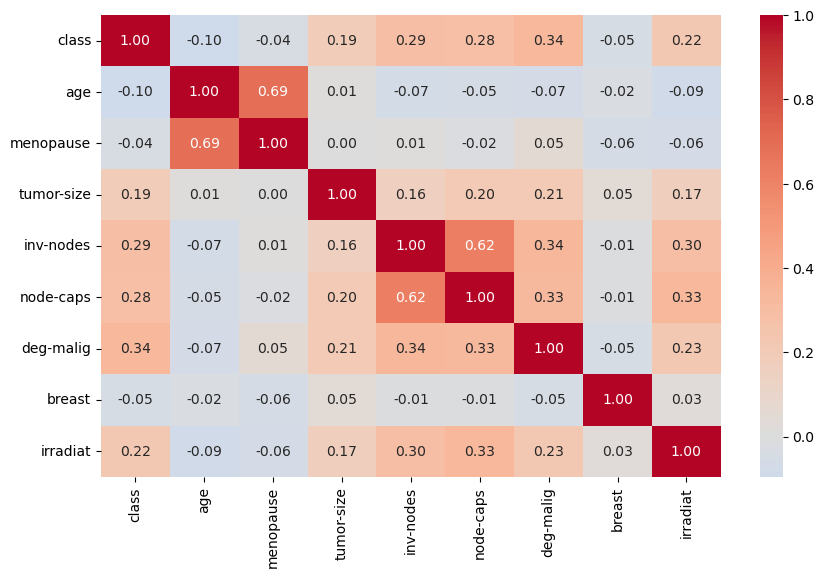

In [ ]:
cols=['class','age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'irradiat']
ncols = df[cols].select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[ncols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

The columns are not highly correlated

In [ ]:
ncl2 = df.select_dtypes(include=np.number).columns
SKEW_THRESHOLD = 2.0
KURT_THRESHOLD = 2.0
ZERO_RATIO_THRESHOLD = 0.10
dft = df.copy()
stats_list = []
for col in ncl2:
    series = dft[col]
    skew_before = series.skew()
    kurt_before = series.kurtosis()
    std_before = series.std()
    transform_type = "NA"
    transform_needed = "No"
    skew_after = skew_before
    kurt_after = kurt_before
    std_after = std_before

    if abs(skew_before) > SKEW_THRESHOLD and abs(kurt_before) > KURT_THRESHOLD:
        zero_ratio = (series == 0).mean()

        if zero_ratio <= ZERO_RATIO_THRESHOLD and (series > 0).all():
            transform_type = "log"
            dft[col] = np.log(series)
        else:
            transform_type = "log1p"
            dft[col] = np.log1p(series.clip(lower=0))

        transform_needed = "Yes"
        skew_after = dft[col].skew()
        kurt_after = dft[col].kurtosis()
        std_after = dft[col].std()

    stats_list.append({
        "numeric_column": col,
        "skew_before": skew_before,
        "kurtosis_before": kurt_before,
        "std_before": std_before,
        "log_transform_needed": transform_needed,
        "log_type": transform_type,
        "skew_after": skew_after,
        "kurtosis_after": kurt_after,
        "std_after": std_after
    })

stat_df = pd.DataFrame(stats_list)
stat_df

,numeric_column,skew_before,kurtosis_before,std_before,log_transform_needed,log_type,skew_after,kurtosis_after,std_after
0,class,0.904114,-1.191200,0.456849,No,NA,0.904114,-1.191200,0.456849
1,age,0.075033,-0.694810,10.057880,No,NA,0.075033,-0.694810,10.057880
2,menopause,0.218275,-1.966556,0.497977,No,NA,0.218275,-1.966556,0.497977
3,tumor-size,0.052050,-0.041343,10.648285,No,NA,0.052050,-0.041343,10.648285
4,inv-nodes,3.080230,11.251322,3.408155,Yes,log,1.546068,0.977213,0.823491
5,node-caps,1.496893,0.242381,0.401798,No,NA,1.496893,0.242381,0.401798
6,deg-malig,-0.095076,-1.116900,0.730858,No,NA,-0.095076,-1.116900,0.730858
7,breast,0.101395,-2.004190,0.500266,No,NA,0.101395,-2.004190,0.500266
8,irradiat,1.337985,-0.211369,0.417023,No,NA,1.337985,-0.211369,0.417023


no column need log or log1p transformation

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
class,0,0,0,0,0,0,0,0,0,0
age,35,45,45,65,45,65,55,65,45,45
menopause,0,0,0,1,0,1,0,1,0,0
tumor-size,32,22,22,17,2,17,27,22,52,22
inv-nodes,1,1,1,1,1,1,1,1,1,1
node-caps,0,0,0,0,0,0,0,0,0,0
deg-malig,3,2,2,2,2,2,2,1,2,2
breast,0,1,0,1,1,0,0,0,0,1
irradiat,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pickle as pcl
with open('us_130.pkl','wb') as f:
    pcl.dump(df,f)
print('done')

done
